<h4>Import statements</h4>

In [2]:
!pip3 install -U torch torchvision torchaudio torchsummary

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay, f1_score)

import torch
import torch.nn as nn
from torchsummary import summary


<h4>Setup Global Parameters</h4>

In [5]:
RANDOM_STATE =24
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

EPOCHS =1000
TEST_SIZE =0.2
ALPHA =0.001

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [7]:
data_df = pd.read_csv('wine.csv')
data_df.head()

,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065,1
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1


In [8]:
data_df.shape

(177, 14)

In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   14.23   177 non-null    float64
 1   1.71    177 non-null    float64
 2   2.43    177 non-null    float64
 3   15.6    177 non-null    float64
 4   127     177 non-null    int64  
 5   2.8     177 non-null    float64
 6   3.06    177 non-null    float64
 7   .28     177 non-null    float64
 8   2.29    177 non-null    float64
 9   5.64    177 non-null    float64
 10  1.04    177 non-null    float64
 11  3.92    177 non-null    float64
 12  1065    177 non-null    int64  
 13  1       177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [10]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
14.23,177.0,12.993672,0.808808,11.03,12.36,13.05,13.67,14.83
1.71,177.0,2.339887,1.119314,0.74,1.60,1.87,3.10,5.80
2.43,177.0,2.366158,0.275080,1.36,2.21,2.36,2.56,3.23
15.6,177.0,19.516949,3.336071,10.60,17.20,19.50,21.50,30.00
127,177.0,99.587571,14.174018,70.00,88.00,98.00,107.00,162.00
2.8,177.0,2.292260,0.626465,0.98,1.74,2.35,2.80,3.88
3.06,177.0,2.023446,0.998658,0.34,1.20,2.13,2.86,5.08
.28,177.0,0.362316,0.124653,0.13,0.27,0.34,0.44,0.66
2.29,177.0,1.586949,0.571545,0.41,1.25,1.55,1.95,3.58
5.64,177.0,5.054802,2.324446,1.28,3.21,4.68,6.20,13.00


<Axes: >

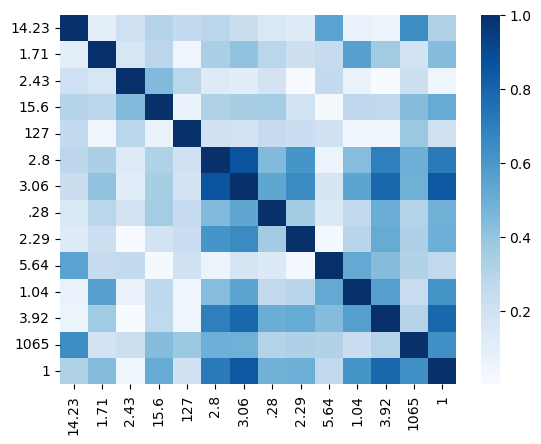

In [11]:
sns.heatmap(data_df.corr().abs(), cmap="Blues")

<Axes: >

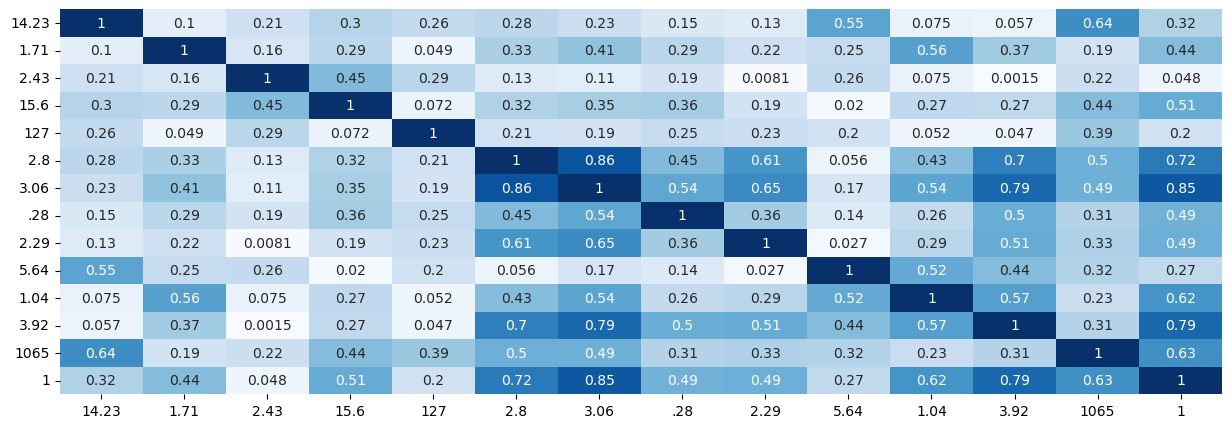

In [12]:
fig , ax = plt.subplots(figsize= (15 ,5))
sns.heatmap(data_df.corr().abs(), cmap="Blues" ,annot= True, fmt=".2g", cbar= False)

In [13]:
for col in data_df.columns:
    print(f'{col}: dadata_df{col}.uniques')

14.23: dadata_df14.23.uniques
1.71: dadata_df1.71.uniques
2.43: dadata_df2.43.uniques
15.6: dadata_df15.6.uniques
127: dadata_df127.uniques
2.8: dadata_df2.8.uniques
3.06: dadata_df3.06.uniques
.28: dadata_df.28.uniques
2.29: dadata_df2.29.uniques
5.64: dadata_df5.64.uniques
1.04: dadata_df1.04.uniques
3.92: dadata_df3.92.uniques
1065: dadata_df1065.uniques
1: dadata_df1.uniques


<h4>Prepare data for training </h4>

In [15]:
labels = data_df[data_df.columns[-1]]
features_df = data_df.drop(data_df.columns[-1], axis =1)
assert features_df.shape[0]==labels.shape[0] , 'Number of examples not same'

In [16]:
# split the data in train test set

X_train, X_test, y_train, y_test = train_test_split(features_df,labels,
                                                    random_state = RANDOM_STATE,
                                                    stratify=labels,
                                                    test_size=TEST_SIZE)

assert X_train.shape[0]==y_train.shape[0] , 'Number of examples not same'
assert X_test.shape[0]==y_test.shape[0] , 'Number of examples not same'

In [17]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)



In [18]:
le = LabelEncoder() # convert 1,2,3 -> 0,1,2
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [19]:
np.unique(y_train)

array([0, 1, 2], dtype=int64)

<h4>Prepare Model</h4>

In [21]:
np.unique(y_train)


array([0, 1, 2], dtype=int64)

In [22]:
# nodes : 13,8,3

model = nn.Sequential(
    nn.Linear(X_train.shape[1],8),
    nn.ReLU(),
    nn.Linear(8,3),
)

display(model)

Sequential(
  (0): Linear(in_features=13, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=3, bias=True)
)

In [23]:
summary(model.to(device=device),(1,13))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]             112
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 3]              27
Total params: 139
Trainable params: 139
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [24]:
# Step1: Loss Function
loss_fn =nn.CrossEntropyLoss()
#Step 2 : Optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=ALPHA)


In [25]:
train_x = torch.tensor(X_train, dtype = torch.float32,device=device)
train_y = torch.tensor(y_train, dtype = torch.int64,device=device)

test_x = torch.tensor(X_test, dtype = torch.float32,device=device)
test_y = torch.tensor(y_test, dtype = torch.int64,device=device)

<h4>Unit Testing</h4>

In [27]:
# pred = model(train_x[:1])
# pred

In [28]:
# loss_fn(pred, train_y[:1])

In [29]:
train_loss, test_loss = [],[]

for epoch in range(EPOCHS):

    model.train()

    outputs = model(train_x)

    loss = loss_fn(outputs, train_y)

    optimizer.zero_grad()  # avoid accumulation of gradient
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())

    model.eval()
    with torch.no_grad():
        test_pred = model(test_x)
        tloss = loss_fn(test_pred, test_y)
    
        test_loss.append(tloss.item())  
    
    if epoch % 100 ==0 or epoch == EPOCHS -1:
        print(f'At epoch {epoch:4d} | Loss: {loss.item(): .4f}')

At epoch    0 | Loss:  1.1137
At epoch  100 | Loss:  0.6227
At epoch  200 | Loss:  0.2644
At epoch  300 | Loss:  0.1231
At epoch  400 | Loss:  0.0757
At epoch  500 | Loss:  0.0515
At epoch  600 | Loss:  0.0376
At epoch  700 | Loss:  0.0288
At epoch  800 | Loss:  0.0227
At epoch  900 | Loss:  0.0183
At epoch  999 | Loss:  0.0150


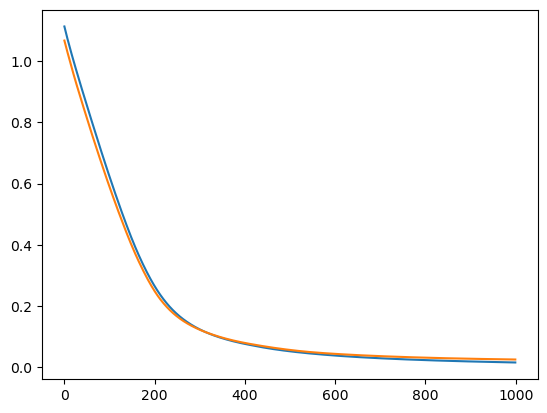

In [30]:
fig, ax= plt.subplots()

ax.plot(train_loss, label = 'Train')
ax.plot(test_loss, label = 'Train')


In [45]:
model.eval()
with torch.no_grad():
    train_pred = model(test_x)
    test_pred = model(test_x)


type(train_pred),type(test_pred)
        
        

(torch.Tensor, torch.Tensor)

In [47]:
y_train_pred = train_pred.detach() # NO GRADIENT
y_train_pred = y_train_pred.cpu().numpy()
y_train_pred = y_train_pred.argmax(axis =1)
y_train_pred

array([1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1,
       1, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2], dtype=int64)

In [49]:
y_test_pred = test_pred.detach().cpu().numpy().argmax(axis =1)


y_test_pred

array([1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1,
       1, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2], dtype=int64)

In [51]:
# loss_df = pd.DataFrame(history.history)
# loss_df.head()

In [53]:
# ax = loss_df.plot(y= ['loss', 'val_loss'])

In [55]:
# ax = loss_df.plot(y= ['accuracy', 'val_accuracy'])

In [57]:
# y_train_pred = model.predict(X_train).argmax(axis = 1)
# y_test_pred = model.predict(X_test).argmax(axis = 1)

In [68]:
# print(f'Accuracy:{accuracy_score(y_train, y_train_pred):.4f}')

In [70]:
print(f'Accuracy:{accuracy_score(y_test, y_test_pred):.4f}')

Accuracy:1.0000


In [72]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [74]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 10]], dtype=int64)

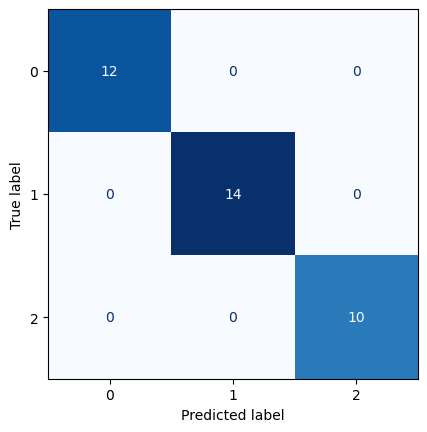

In [76]:
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Blues", colorbar=False)

In [78]:
""" f1 = 2* (precsion * recall)/( """
f1_score(y_test, y_test_pred, average="weighted")

1.0